<a href="https://colab.research.google.com/github/sprashant19/Crypto_price_prediction/blob/main/Crypto_tommorow_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
#Importing the necessary modules or libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [63]:
#Accessing the data
data = pd.read_csv("/content/BNB-USD.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume,Previous_open,Previous_high,Previous_low
0,17-07-2021,302.934845,306.530853,295.387482,300.497925,300.497925,1298507379,NaN,NaN,NaN
1,18-07-2021,300.595978,309.114258,299.972260,302.480499,302.480499,1254819647,302.934845,306.530853,295.387482
2,19-07-2021,302.268219,303.829193,279.708527,280.018616,280.018616,1514754521,300.595978,309.114258,299.972260
3,20-07-2021,280.564972,283.206146,255.850754,264.782379,264.782379,1819454491,302.268219,303.829193,279.708527
4,21-07-2021,264.494751,298.791748,261.226379,292.531372,292.531372,1957623339,280.564972,283.206146,255.850754
...,...,...,...,...,...,...,...,...,...,...
361,13-07-2022,220.492416,230.538712,216.816803,230.524765,230.524765,1431776142,225.868393,228.190842,220.464554
362,14-07-2022,230.512329,239.660156,227.579910,238.164474,238.164474,1609361574,220.492416,230.538712,216.816803
363,15-07-2022,238.226624,241.833420,235.683151,238.573990,238.573990,1151260376,230.512329,239.660156,227.579910
364,16-07-2022,238.559067,250.758759,234.117676,249.593872,249.593872,1030985968,238.226624,241.833420,235.683151


In [64]:
#Filling the null values with previous date
data.fillna(method='ffill',inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume,Previous_open,Previous_high,Previous_low
0,17-07-2021,302.934845,306.530853,295.387482,300.497925,300.497925,1298507379,NaN,NaN,NaN
1,18-07-2021,300.595978,309.114258,299.972260,302.480499,302.480499,1254819647,302.934845,306.530853,295.387482
2,19-07-2021,302.268219,303.829193,279.708527,280.018616,280.018616,1514754521,300.595978,309.114258,299.972260
3,20-07-2021,280.564972,283.206146,255.850754,264.782379,264.782379,1819454491,302.268219,303.829193,279.708527
4,21-07-2021,264.494751,298.791748,261.226379,292.531372,292.531372,1957623339,280.564972,283.206146,255.850754
...,...,...,...,...,...,...,...,...,...,...
361,13-07-2022,220.492416,230.538712,216.816803,230.524765,230.524765,1431776142,225.868393,228.190842,220.464554
362,14-07-2022,230.512329,239.660156,227.579910,238.164474,238.164474,1609361574,220.492416,230.538712,216.816803
363,15-07-2022,238.226624,241.833420,235.683151,238.573990,238.573990,1151260376,230.512329,239.660156,227.579910
364,16-07-2022,238.559067,250.758759,234.117676,249.593872,249.593872,1030985968,238.226624,241.833420,235.683151


In [65]:
#dropping the data of 17-07-2021, since without data of 16th, its not possible to calculate this day's previous data.
data=data.iloc[1:]

In [66]:
#dropping the unnecessary data
data = data.drop(columns=['Adj Close','Date','Open','High','Low','Volume'])

In [67]:
#Findng the correlation between the feature and target
data[['Previous_open','Previous_high','Previous_low','Close']].corr()

,Previous_open,Previous_high,Previous_low,Close
Previous_open,1.000000,0.995329,0.990580,0.974695
Previous_high,0.995329,1.000000,0.990833,0.981998
Previous_low,0.990580,0.990833,1.000000,0.979714
Close,0.974695,0.981998,0.979714,1.000000


Exploratory Data Analysis

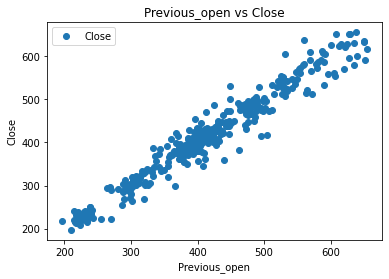

In [68]:
data.plot(x='Previous_open',y='Close',style='o')
plt.title('Previous_open vs Close')
plt.xlabel('Previous_open')
plt.ylabel('Close')
plt.show()

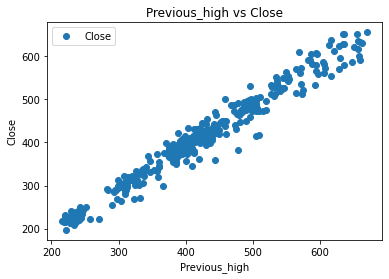

In [69]:
data.plot(x='Previous_high',y='Close',style='o')
plt.title('Previous_high vs Close')
plt.xlabel('Previous_high')
plt.ylabel('Close')
plt.show()

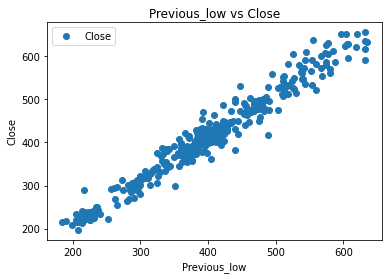

In [70]:
data.plot(x='Previous_low',y='Close',style='o')
plt.title('Previous_low vs Close')
plt.xlabel('Previous_low')
plt.ylabel('Close')
plt.show()

In [71]:
#Preparing the Data
x=data[['Previous_open','Previous_high','Previous_low']].values
y=data['Close'].values

In [72]:
#Splitting the Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [73]:
#Model Training
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [74]:
#Prediction of test data
y_pred=regressor.predict(x_test)

In [75]:
#Actual data and predicted data
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,290.341125,304.936346
1,367.471680,383.518567
2,449.053497,449.710981
3,438.803070,439.132001
4,428.916107,440.459246
...,...,...
87,479.006104,499.316743
88,255.950882,278.685478
89,402.550690,408.397293
90,415.919800,412.638492


In [76]:
#Evaluation Metrics
print("R2 Score : ",metrics.r2_score(y_test,y_pred))

R2 Score :  0.9633649500378085


In [77]:
#Coefficients of each feature 
m1=regressor.coef_[0]
m2=regressor.coef_[1]
m3=regressor.coef_[2]
print("Coefficient of Previous_open : ",m1)
print("Coefficient of Previous_high : ",m2)
print("Coefficient of Previous_low : ",m3)

Coefficient of Previous_open :  -0.4987788441971475
Coefficient of Previous_high :  0.9932580470752275
Coefficient of Previous_low :  0.4828300426095622


In [78]:
#Intercept value
regressor.intercept_ 

4.720620918671102

In [79]:
#Tommorow's prediction
u = float(input("Enter Today's Open value : "))
v = float(input("Enter Today's High Value : "))
w = float(input("Enter Today's Low Value : "))
c=regressor.intercept_ 

y = m1*u + m2*v + m3*w  + c
print("Tommorow's prediction is : ",y)


Enter Today's Open value : 293.6013
Enter Today's High Value : 300.9938
Enter Today's Low Value : 281.6961
Tommorow's prediction is :  293.2543577855903
